# <center> Introduction to Mapper with Python</center>

### <center> Sarah Percival </center>
<center> Department of Mathematics and Statistics, University of New Mexico</center>

# Welcome
We explore Mapper with Python via several Python packages. Email spercival@unm.edu with questions or comments.

# Goals
* Apply Mapper to real-world datasets
* Understand how Mapper parameters affect the Mapper graph
* Explore adaptive covers

# The basic pipeline

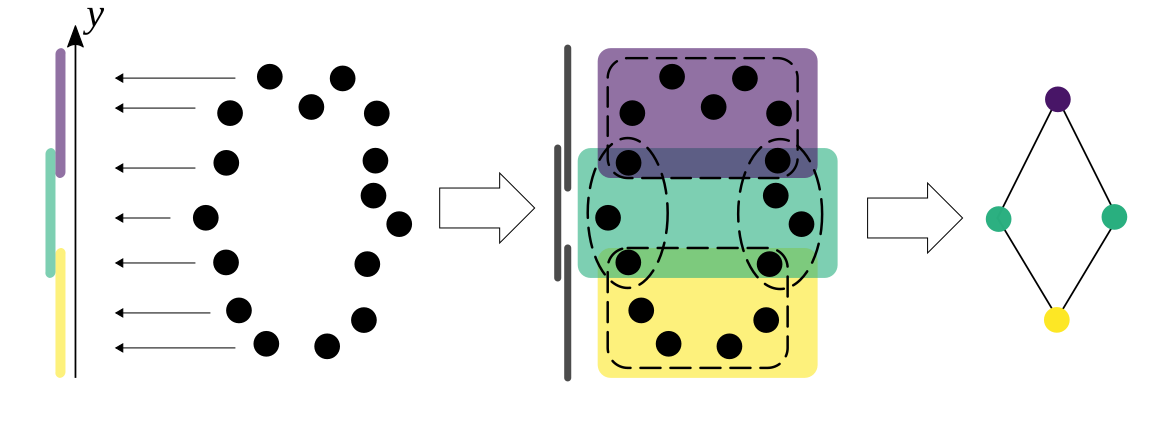

Here is the original paper that introduced Mapper: https://diglib.eg.org/server/api/core/bitstreams/f770fe2e-d1d7-47e5-a55d-e5c0ecdd42ee/content

# Install the necessary packages

In [1]:
# !pip install -U scikit-learn

# !pip install kmapper

# !pip install pandas

In [2]:
# if the above doesn't work, run
#  conda install tpeulen::kmapper 
# in a terminal window

# Example with toy data

#### Generate data

In [3]:
from sklearn.datasets import make_circles
data, labels = make_circles(n_samples=1_000, factor=0.5, noise=0.03, random_state=0)

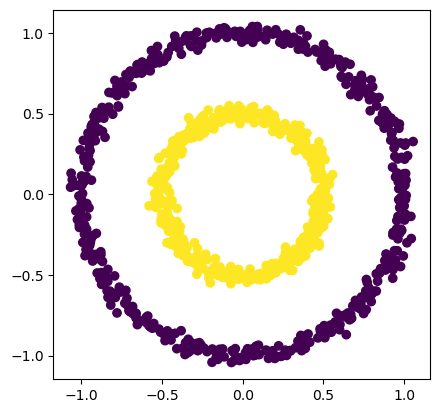

In [4]:
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.axis('scaled');

#### Run the Mapper pipeline

In [5]:
import kmapper as km
import sklearn

# Initialize
# "verbose" refers to how much descriptive text is output
mapper = km.KeplerMapper(verbose=1)

# Project onto the x-axis
lens = mapper.fit_transform(data, projection=[0], scaler=None) # X-Y axis

# Create a cover with 10 elements and 30% overlap
cover = km.Cover(n_cubes=10, perc_overlap=0.3)

# Create dictionary called 'graph' with nodes, edges and meta-information
# Use DBSCAN as the clusterer with epsilon=0.1 and min_samples = 5
graph = mapper.map(lens, data, cover=cover, clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=5))

# Visualize it
mapper.visualize(graph, path_html="make_circles_keplermapper_output.html",
                 title="make_circles(n_samples=1000, noise=0.03, factor=0.5)");

# To see the graph, open the .html file in the same directory as this notebook
# note that every time you run this cell, the output graph gets overwritten if you do not change path_html

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: None
..Projecting on data shaped (1000, 2)

..Projecting data using: [0]
Mapping on data shaped (1000, 2) using lens shaped (1000, 1)

Creating 10 hypercubes.

Created 26 edges and 26 nodes in 0:00:00.027394.
Wrote visualization to: make_circles_keplermapper_output.html


#### Experiment with changing the cover and clusterer parameters

In [6]:
mapper = km.KeplerMapper(verbose=1)

# Project onto the x-axis
lens = mapper.fit_transform(data, projection=[0], scaler=None) # X-axis

# Create a cover with 10 elements and 70% overlap
cover = km.Cover(n_cubes=10, perc_overlap=0.7)

# Use DBSCAN as the clusterer with epsilon=0.1 and min_samples = 5
graph = mapper.map(lens, data, cover=cover, clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=2))

# Visualize it
mapper.visualize(graph, path_html="make_circles_keplermapper_output2.html",
                 title="make_circles(n_samples=1000, noise=0.03, factor=0.5)");

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: None
..Projecting on data shaped (1000, 2)

..Projecting data using: [0]
Mapping on data shaped (1000, 2) using lens shaped (1000, 1)

Creating 10 hypercubes.

Created 75 edges and 26 nodes in 0:00:00.049566.
Wrote visualization to: make_circles_keplermapper_output2.html


#### Different lens functions: exploring documentation

https://kepler-mapper.scikit-tda.org/en/latest/reference/stubs/kmapper.KeplerMapper.html#kmapper.KeplerMapper.project

In [7]:
mapper = km.KeplerMapper(verbose=1)

# Project onto the x-axis
lens = mapper.fit_transform(data, projection='median', scaler=None)

# Create a cover with 10 elements and 30% overlap
cover = km.Cover(n_cubes=10, perc_overlap=0.3)

# Use DBSCAN as the clusterer with epsilon=0.1 and min_samples = 5
graph = mapper.map(lens, data, cover=cover, clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=5))

# Visualize it
mapper.visualize(graph, path_html="make_circles_keplermapper_output3.html",
                 title="make_circles(n_samples=1000, noise=0.03, factor=0.5)");

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: median
	Distance matrices: False
	Scalers: None
..Projecting on data shaped (1000, 2)

..Projecting data using: median
Mapping on data shaped (1000, 2) using lens shaped (1000, 1)

Creating 10 hypercubes.

Created 26 edges and 26 nodes in 0:00:00.074830.
Wrote visualization to: make_circles_keplermapper_output3.html


#### Mapper can also project to more than one dimension

In [8]:
mapper = km.KeplerMapper(verbose=1)

# Project onto the x-axis
lens = mapper.fit_transform(data, projection=[0,1], scaler=None)

# Create a cover with 10 elements and 30% overlap
cover = km.Cover(n_cubes=10, perc_overlap=0.3)

# Use DBSCAN as the clusterer with epsilon=0.1 and min_samples = 5
graph = mapper.map(lens, data, cover=cover, clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=5))

# Visualize it
mapper.visualize(graph, path_html="make_circles_keplermapper_output4.html",
                 title="make_circles(n_samples=1000, noise=0.03, factor=0.5)");

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: None
..Projecting on data shaped (1000, 2)

..Projecting data using: [0, 1]
Mapping on data shaped (1000, 2) using lens shaped (1000, 2)

Creating 100 hypercubes.

Created 128 edges and 68 nodes in 0:00:00.136995.
Wrote visualization to: make_circles_keplermapper_output4.html


# Mapper on an ant

In [9]:
import pandas as pd
import numpy as np
ant=pd.read_csv('ant.csv', sep=",")
ant=np.nan_to_num(ant.values)

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


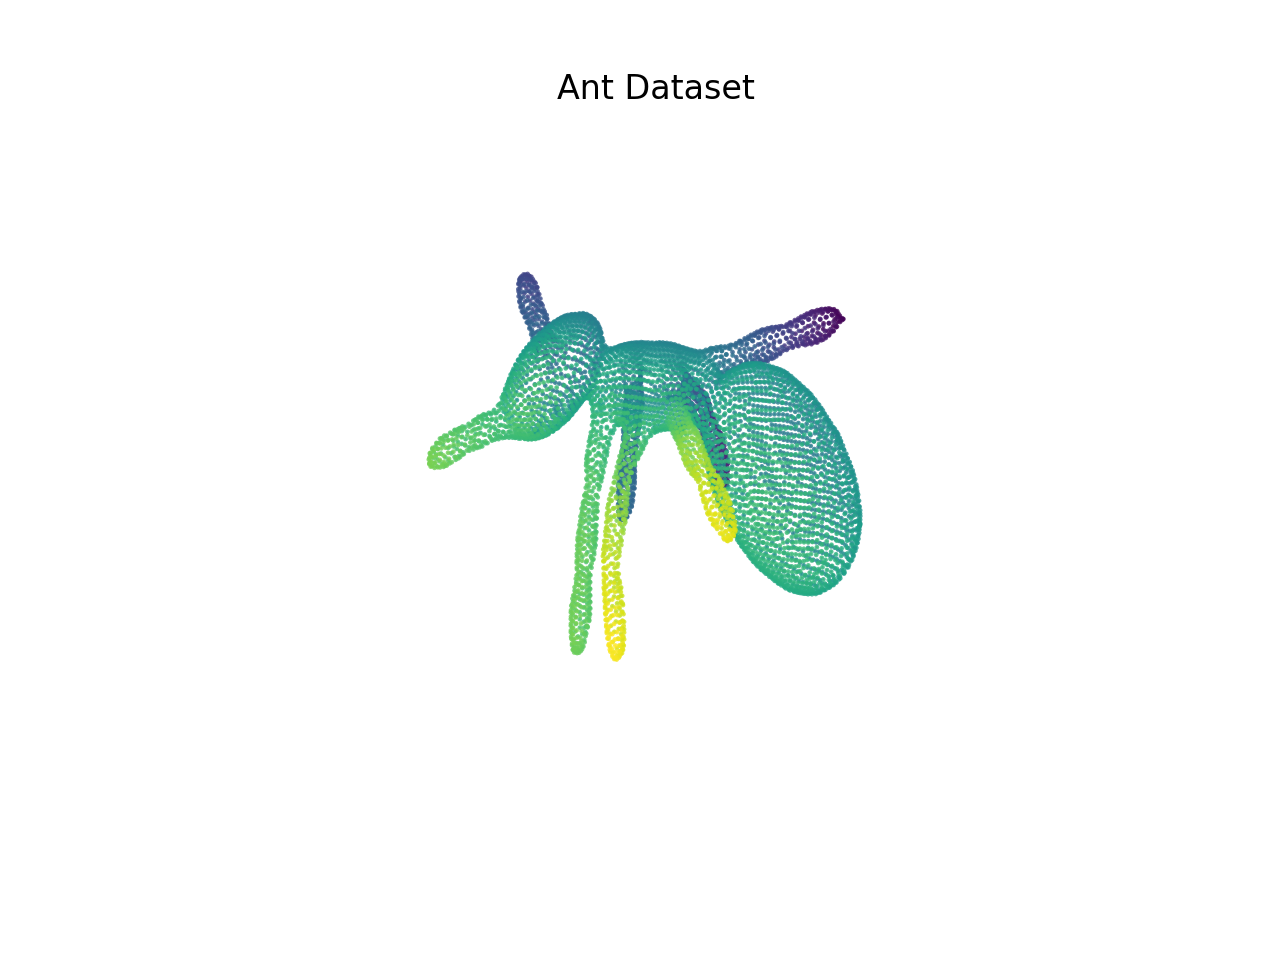

In [11]:
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.set_axis_off()
ax.scatter3D(ant[:,0], ant[:,1], ant[:,2], alpha = 0.8,
                    c = (ant[:,0]), s=0.5)
plt.title("Ant Dataset")
plt.show()

In [12]:
mapper = km.KeplerMapper(verbose=1)

# Project onto the x-axis
lens = mapper.fit_transform(ant, projection=[0], scaler=None)

# Create a cover with 15 elements and 50% overlap
cover = km.Cover(n_cubes=15, perc_overlap=0.5)

# Use DBSCAN as the clusterer with epsilon=0.05 and min_samples = 5
graph = mapper.map(lens, ant, cover=cover, clusterer=sklearn.cluster.DBSCAN(eps=0.05, min_samples=5))

# Visualize it
mapper.visualize(graph, path_html="ant_keplermapper_output.html",
                 title="make_circles(n_samples=1000, noise=0.03, factor=0.5)");

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: None
..Projecting on data shaped (6368, 3)

..Projecting data using: [0]
Mapping on data shaped (6368, 3) using lens shaped (6368, 1)

Creating 15 hypercubes.

Created 36 edges and 37 nodes in 0:00:00.269815.
Wrote visualization to: ant_keplermapper_output.html


# Classification

In [21]:
from sklearn import datasets
# Load digits data
digits, labels = datasets.load_digits().data, datasets.load_digits().target

Each entry of digits is a vector of length 64 encoding grayscale values in an 8x8 image. We can reshape it into the original 8x8 grid:

In [33]:
np.reshape(digits[0], (8, 8))

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<IPython.core.display.Javascript object>


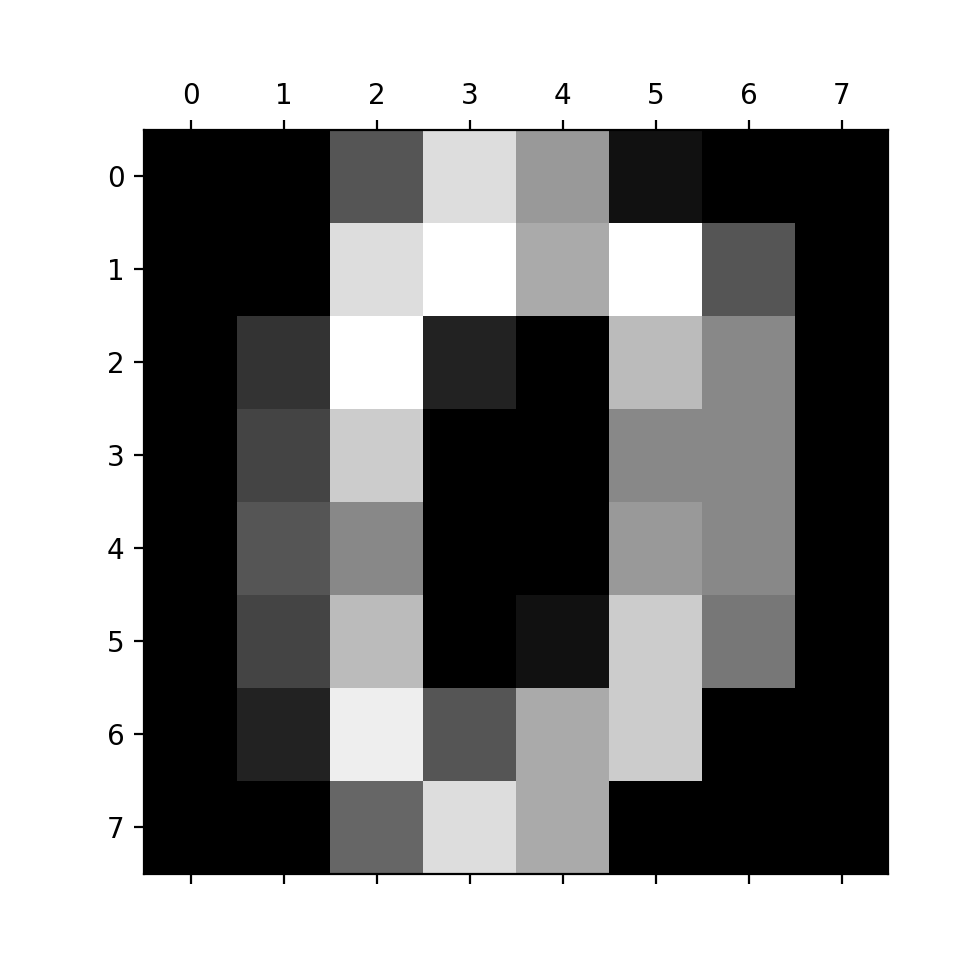

In [36]:
# plot digits data
plt.gray()
plt.matshow(np.reshape(digits[0], (8, 8))) # change the 0 to see different dataset elements
plt.show()

The cell below is to create tooltips based on the letter images. Run it and don't worry about the code. If you're interested, this is from https://kepler-mapper.scikit-tda.org/en/latest/examples.html

In [14]:
from sklearn.preprocessing import MinMaxScaler
import io
import base64
from PIL import Image
from pathlib import Path

# Raw data is (0, 16), so scale to 8 bits (pillow can't handle 4-bit greyscale PNG depth)
scaler = MinMaxScaler(feature_range=(0, 255))
digist = scaler.fit_transform(digits).astype(np.uint8)

# Create images for a custom tooltip array
tooltip_s = []
for image_data in digits:
    with io.BytesIO() as output:
        img = Image.fromarray(image_data.reshape((8, 8)), "L")
        img.save(output, "PNG")
        contents = output.getvalue()
        img_encoded = base64.b64encode(contents)
        img_tag = """<img src="data:image/png;base64,{}">""".format(
            img_encoded.decode("utf-8")
        )
        tooltip_s.append(img_tag)

# need to make sure to feed it as a NumPy array, not a list
tooltip_s = np.array(
    tooltip_s
)  

if Path("output/").is_dir():
    prepend = "output/"
else:
    prepend = "./"

In [15]:
# Initialize to use t-SNE with 2 components (reduces data to 2 dimensions). Also note high overlap_percentage.
mapper = km.KeplerMapper(verbose=1)

# Fit and transform data
projected_digits = mapper.fit_transform(digits, projection=sklearn.manifold.TSNE())

# Create the graph (we cluster on the projected data and suffer projection loss)
graph = mapper.map(
    projected_digits,
    clusterer=sklearn.cluster.DBSCAN(eps=0.3, min_samples=15),
    cover=km.Cover(35, 0.4)
)

# Tooltips with image data for every cluster member
mapper.visualize(
    graph,
    title="Handwritten digits Mapper",
    path_html=prepend + "digits_custom_tooltips.html",
    custom_tooltips=tooltip_s,
 );

# # Tooltips with the target y-labels for every cluster member
# mapper.visualize(
#     graph,
#     title="Handwritten digits Mapper",
#     path_html=prepend + "digits_ylabel_tooltips.html",
#     custom_tooltips=labels,
# );

/Users/Sarah/opt/anaconda3/envs/MRC/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/Sarah/opt/anaconda3/envs/MRC/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: TSNE()
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (1797, 64)

..Projecting data using: 
	TSNE(verbose=1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.000s...
[t-SNE] Computed neighbors for 1797 samples in 0.137s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 186.389054
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.506653
[t-SNE] KL divergence after 1000 iterations: 0.740633

..Scaling with: MinMaxScaler()

Mapping on data shaped (1797, 2) using lens shaped (1797, 2)

Creating 1225 hypercubes.

Created 364 edges and 157 nodes in 0:00:00.337068.
Wrote visualization to: ./digits_custom_tooltips.html


The above mapper graph uses a projection called t-SNE. There's a lot of great videos on YouTube explaining it, but let's talk briefly about dimension reduction.

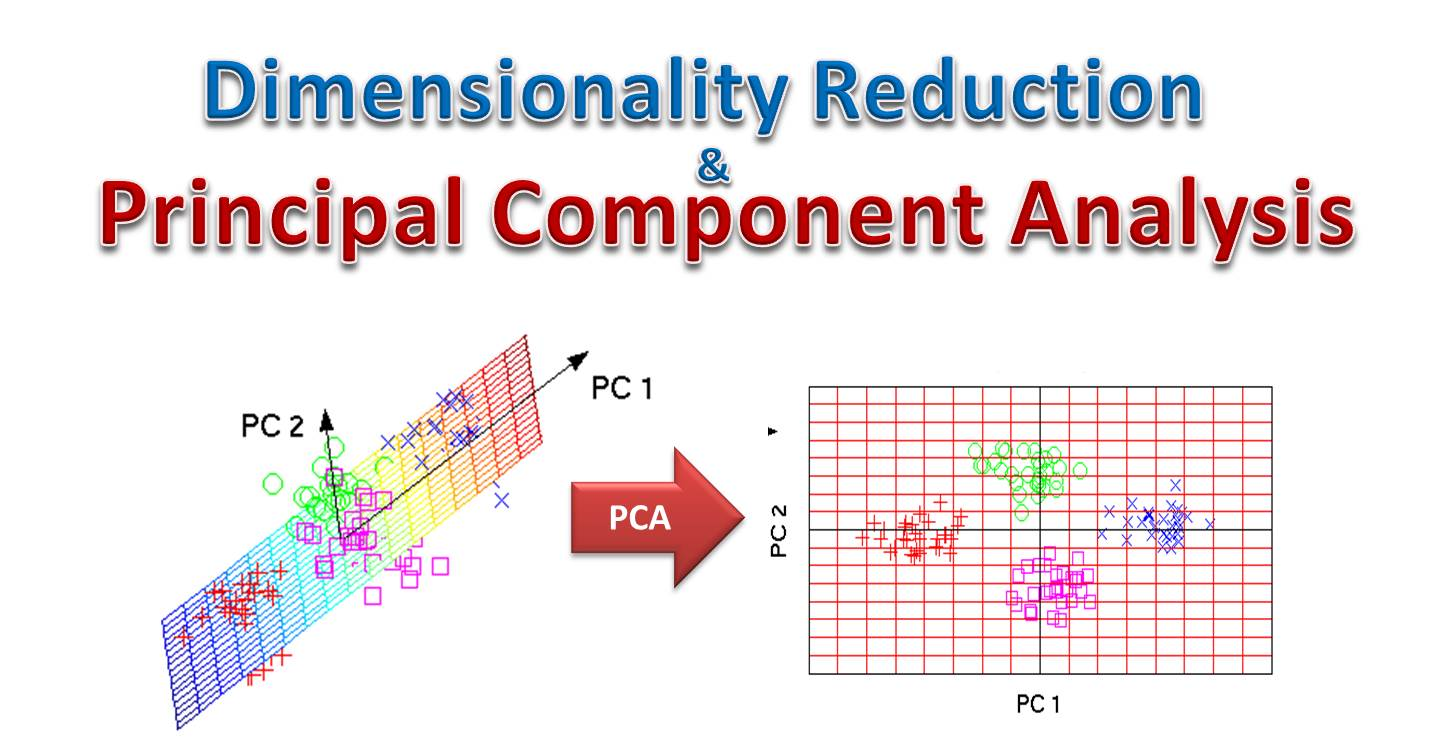

Image source: https://ashutoshtripathi.com/wp-content/uploads/2019/07/pca_title-1.jpg

https://github.com/gauss256/t-SNE/blob/master/t-SNE%20Explorations.ipynb

# Your turn:
Find a dataset on the internet, think of a logical choice for a lens function, and create a mapper graph.
kaggle.com has many useable datasets.